# **Imports**

In [1]:
import os
os.chdir("../../..")
os.chdir(r"src")

from GloVe.weights import *
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from Axes.projection_functions import *
from Polarization.polarization_functions import *
import math
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

os.chdir("../")

# **Overall Parliament**

In [2]:
party_1 = "Lab"
party_2 = "Con"

In [3]:
import datetime

def print_with_timestamp(message):
    """
    Prints a message with a timestamp.

    :param message: The message to print.
    """
    # Get the current time
    now = datetime.datetime.now()
    
    # Format the timestamp as desired
    timestamp = now.strftime("%Y-%m-%d %H:%M:%S")
    
    # Print the message with the timestamp
    print(f"{timestamp}: {message}")

In [7]:
df = standard_opening(
        "data/FinalDataframes/FilteredFinalDataFrame_201" + str(3) + ".csv", True
    )

In [12]:
df[df['source'] =='DE']

,index,year,Speaker,party,text,source,keywords,agenda,url
level_0,,,,,,,,,
7310,NaN,2013.0,NaN,NaN,"[develop, inevit, meant, chang, date, game, gu...",DE,[tech],"[dont, digit, date]",https://www.express.co.uk/life-style/science-t...
7311,NaN,2013.0,NaN,NaN,"[easi, brand, luddit, gadget, behind, crowd, t...",DE,[tech],"[techonolog, cant, stop, march, progress]",https://www.express.co.uk/life-style/science-t...
7312,NaN,2013.0,NaN,NaN,"[speak, mysteri, event, compani, headquart, me...",DE,[facebook],"[facebook, creat, search, engin]",https://www.express.co.uk/news/uk/371044/faceb...
7313,NaN,2013.0,NaN,NaN,"[internet, troll, mark, post, chill, messag, w...",DE,[facebook],"[depress, lifestyl, facebook, threat, thug]",https://www.express.co.uk/news/uk/370867/depre...
7314,NaN,2013.0,NaN,NaN,"[graph, search, engin, access, inform, share, ...",DE,"[facebook, tech]","[facebook, launch, search, engin, graph, search]",https://www.express.co.uk/life-style/science-t...
...,...,...,...,...,...,...,...,...,...
16591,NaN,2013.0,NaN,NaN,"[three, investor, compani, want, replac, gate,...",DE,"[microsoft, gates]","[gate, pressur, quit, microsoft]",https://www.express.co.uk/finance/city/433921/...
16592,NaN,2013.0,NaN,NaN,"[awardwin, rapper, dwarf, enorm, model, surfac...",DE,[surface],"[dizze, surfac, launch, tablet]",https://www.express.co.uk/news/uk/438874/dizze...
16593,NaN,2013.0,NaN,NaN,"[power, successor, offici, went, sale, midnigh...",DE,[tech],"[eager, queue, hour, soni, playstat, launch]",https://www.express.co.uk/life-style/science-t...


In [4]:
real_pol = []
random_pol = []
CI_lows_real = []
CI_high_real = []
CI_lows_random = []
CI_high_random = []

for i in tqdm(range(10)):
    df = standard_opening(
        "data/FinalDataframes/FilteredFinalDataFrame_201" + str(i) + ".csv", True
    )
    df = df[df["source"] == "par"]
    year = eval("201" + str(i))

    print('la len de df est '+str(len(df)))

    print_with_timestamp('avant de compute les values')
    values = compute_polarization_and_CI(df, year, party_1, party_2)
    print_with_timestamp('après avoir compute les values')

    real_pol.append(values[0])
    random_pol.append(values[1])

    CI_lows_real.append(values[2])
    CI_high_real.append(values[3])
    CI_lows_random.append(values[4])
    CI_high_random.append(values[5])

    print(values[0])

    print("Year 201" + str(i) + " computed")

  0%|          | 0/10 [00:00<?, ?it/s]

la len de df est 21832
2024-03-21 07:55:17: avant de compute les values


 10%|█         | 1/10 [01:35<14:15, 95.01s/it]

2024-03-21 07:56:48: après avoir compute les values
0.5049493909378511
Year 2010 computed
la len de df est 24962
2024-03-21 07:56:53: avant de compute les values


 20%|██        | 2/10 [03:09<12:39, 94.96s/it]

2024-03-21 07:58:23: après avoir compute les values
0.5074017177379185
Year 2011 computed
la len de df est 22692
2024-03-21 07:58:27: avant de compute les values


 30%|███       | 3/10 [04:40<10:50, 92.88s/it]

2024-03-21 07:59:54: après avoir compute les values
0.5074190057573603
Year 2012 computed
la len de df est 24728
2024-03-21 07:59:58: avant de compute les values


 40%|████      | 4/10 [06:17<09:26, 94.49s/it]

2024-03-21 08:01:31: après avoir compute les values
0.5081598774398101
Year 2013 computed
la len de df est 22452
2024-03-21 08:01:36: avant de compute les values


 50%|█████     | 5/10 [07:49<07:48, 93.74s/it]

2024-03-21 08:03:03: après avoir compute les values
0.5072184204001211
Year 2014 computed
la len de df est 20852
2024-03-21 08:03:08: avant de compute les values


 60%|██████    | 6/10 [09:19<06:09, 92.41s/it]

2024-03-21 08:04:33: après avoir compute les values
0.5092800470562432
Year 2015 computed
la len de df est 25602
2024-03-21 08:04:39: avant de compute les values


 70%|███████   | 7/10 [10:58<04:43, 94.39s/it]

2024-03-21 08:06:11: après avoir compute les values
0.5092089677220946
Year 2016 computed
la len de df est 22249
2024-03-21 08:06:17: avant de compute les values


 80%|████████  | 8/10 [12:33<03:09, 94.62s/it]

2024-03-21 08:07:47: après avoir compute les values
0.5115856451490097
Year 2017 computed
la len de df est 28205
2024-03-21 08:07:53: avant de compute les values


 90%|█████████ | 9/10 [14:19<01:38, 98.31s/it]

2024-03-21 08:09:33: après avoir compute les values
0.5108078096085928
Year 2018 computed
la len de df est 24508
2024-03-21 08:09:38: avant de compute les values


100%|██████████| 10/10 [15:51<00:00, 95.14s/it]

2024-03-21 08:11:05: après avoir compute les values
0.5111704326140949
Year 2019 computed


In [5]:
df_pol_parliament = pd.DataFrame(
    {
        "real polarization": real_pol,
        "random polarization": random_pol,
        "real low CI": CI_lows_real,
        "real high CI": CI_high_real,
        "random low CI": CI_lows_random,
        "random high CI": CI_high_random,
    }
)

df_pol_parliament.to_csv(
    "data/polarization values/parliament polarisation values", index=False
)

real_pol = np.array(real_pol)
random_pol = np.array(random_pol)
CI_lows_real = np.array(CI_lows_real)
CI_high_real = np.array(CI_high_real)
CI_lows_random = np.array(CI_lows_random)
CI_high_random = np.array(CI_high_random)
x = [2010 + i for i in range(len(real_pol))]

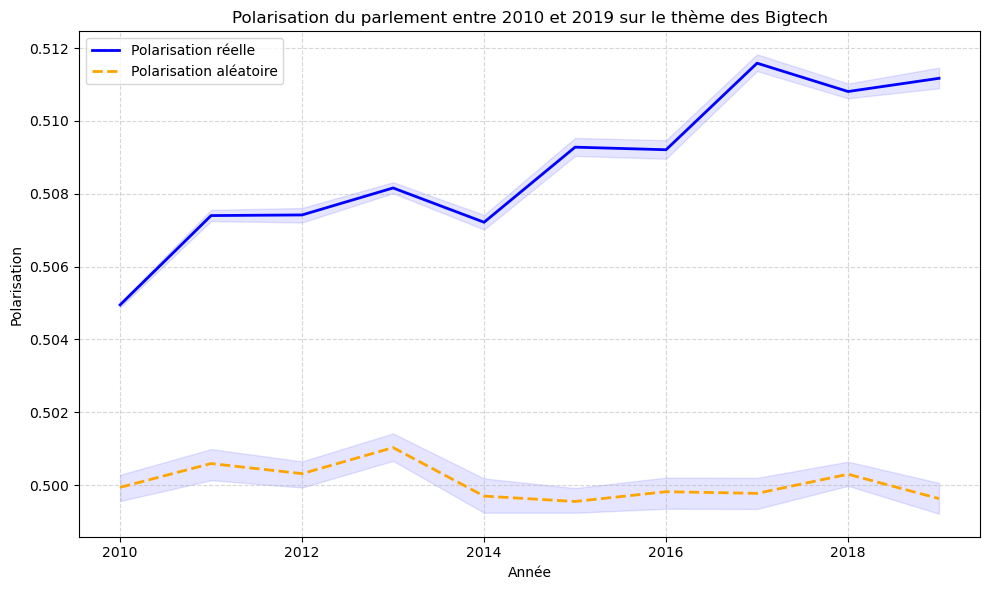

In [6]:
# Création du graphique
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.plot(
    x, real_pol, label="Polarisation réelle", color="blue", linewidth=2
)  # Tracé de la polarisation réelle
plt.fill_between(
    x, CI_lows_real, CI_high_real, color="blue", alpha=0.1
)  # Remplissage de l'intervalle de confiance
plt.plot(
    x,
    random_pol,
    label="Polarisation aléatoire",
    color="orange",
    linestyle="--",
    linewidth=2,
)  # Tracé de la polarisation aléatoire en pointillés
plt.fill_between(
    x, CI_lows_random, CI_high_random, color="blue", alpha=0.1
)  # Remplissage de l'intervalle de confiance

plt.title(
    "Polarisation du parlement entre 2010 et 2019 sur le thème des Bigtech"
)  # Titre du graphique
plt.xlabel("Année")  # Nom de l'axe des x
plt.ylabel("Polarisation")  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle="--", alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique

# **By company**

In [ ]:
party_1 = "Lab"
party_2 = "Con"

In [ ]:
dfs_BT = []
for i in tqdm(range(10)):
    df = standard_opening(
        "data/FinalDataframes/FilteredFinalDataFrame_201" + str(i) + ".csv", True
    )
    df = df[df["source"] == "par"]
    dfs_BT.append(df_BT(df))

In [ ]:
values_by_company = {}
companies = ["am", "fb", "ap", "go", "mi"]

for company in companies:
    values_by_company[company] = {}

    values_by_company[company]["real_pol"] = []
    values_by_company[company]["random_pol"] = []
    values_by_company[company]["CI_lows_real"] = []
    values_by_company[company]["CI_high_real"] = []
    values_by_company[company]["CI_lows_random"] = []
    values_by_company[company]["CI_high_random"] = []

    for i in tqdm(range(10)):
        df = dfs_BT[i]
        df = df[df["source"] == "par"]
        df = df[df["class"] == company]
        year = eval("201" + str(i))

        values = compute_polarization_and_CI(df, year, party_1, party_2)

        values_by_company[company]["real_pol"].append(values[0])
        values_by_company[company]["random_pol"].append(values[1])

        values_by_company[company]["CI_lows_real"].append(values[2])
        values_by_company[company]["CI_high_real"].append(values[3])
        values_by_company[company]["CI_lows_random"].append(values[4])
        values_by_company[company]["CI_high_random"].append(values[5])

        print("Year 201" + str(i) + " computed")

In [ ]:
df_pol_parliament_BT = {}
for company in companies:
    df_pol_parliament_BT[company] = pd.DataFrame(values_by_company[company])
    df_pol_parliament_BT[company].to_csv(
        "data/polarization values/parliament polarisation values " + company,
        index=False,
    )

In [ ]:
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

for company in companies:
    real_pol = np.array(df_pol_parliament_BT[company]["real_pol"])
    # random_pol = np.array(df_pol_parliament_BT[company]['random_pol'])
    CI_lows_real = np.array(df_pol_parliament_BT[company]["CI_lows_real"])
    CI_high_real = np.array(df_pol_parliament_BT[company]["CI_high_real"])
    # CI_lows_random = np.array(df_pol_parliament_BT[company]['CI_lows_random'])
    # CI_high_random = np.array(df_pol_parliament_BT[company]['CI_high_random'])
    x = [2010 + i for i in range(len(real_pol))]

    plt.plot(
        x, real_pol, label="Polarisation réelle " + company, linewidth=2
    )  # Tracé de la polarisation réelle
    plt.fill_between(
        x, CI_lows_real, CI_high_real, alpha=0.1
    )  # Remplissage de l'intervalle de confiance

plt.title(
    "Polarisation du parlement entre 2010 et 2019 par Bigtech"
)  # Titre du graphique
plt.xlabel("Année")  # Nom de l'axe des x
plt.ylabel("Polarisation")  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle="--", alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique

### **A look at the number of articles by company**

In [ ]:
l_tot = {"fb": [], "am": [], "go": [], "ap": [], "mi": []}
l_par = {"fb": [], "am": [], "go": [], "ap": [], "mi": []}
companies = ["am", "fb", "ap", "go", "mi"]

for i in tqdm(range(10)):
    df = standard_opening(
        "data/FinalDataframes/FilteredFinalDataFrame_201" + str(i) + ".csv", True
    )
    df = df_BT(df)

    df_par = df[df["source"] == "par"]

    for company in companies:
        df_par_company = df_par[df_par["class"] == company]
        df_company = df[df["class"] == company]

        l_tot[company].append(len(df_company))
        l_par[company].append(len(df_par_company))

In [ ]:
# Years
years = range(2010, 2020)

# Plotting the first plot
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
for i, (key, values) in enumerate(l_tot.items()):
    plt.plot(
        years,
        values,
        label=key,
        color=colors[i % len(colors)],
        linestyle=line_styles[i % len(line_styles)],
        linewidth=2,
    )

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Articles or Speeches", fontsize=14)
plt.title("Number of Articles by Company from All Sources", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.style.use("seaborn-darkgrid")

# Plotting the second plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
for i, (key, values) in enumerate(l_par.items()):
    plt.plot(
        years,
        values,
        label=key,
        color=colors[i % len(colors)],
        linestyle=line_styles[i % len(line_styles)],
        linewidth=2,
    )

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Speeches", fontsize=14)
plt.title("Number of Speeches by Company from the Parliament", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.style.use("seaborn-darkgrid")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()